<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 3 : Groupement hiérarchique de documents

## Résumé
Le but de ce laboratoire est d'appliquer un algorithme de groupement hiérarchique à des résumés de films.  Vous afficherez les résultats et observerez quels paramètres permettent d'obtenir un groupement convenable, car il n'y a pas de vérité-terrain dans ces données.

Les étapes proposées sont les suivantes :
  1. Préparation des documents : pré-traitement des textes des résumés
  2. Création des représentations vectorielles de chaque résumé
  3. Groupement hiérarchique, affichage du dendrogramme, et discussion

## 1. Préparation des documents

Dans ce labo, vous utiliserez les titres et résumés des 100 films classiques (*référence anonymisée*) qui vous sont fournis sur Cyberlearn dans le fichier `movie_data.csv` sur deux colonnes : titres et résumés.

Dans cette première partie, vous allez transformer les textes des résumés pour réduire la diversité du vocabulaire.  Un ensemble de fonctions de préparation vous est fourni dans la librairie `utils.py` (également sur Cyberlearn) et il est conseillé de les lire et de les utiliser.

In [1]:
import pandas as pd
import utils # librairie avec des fonctions de pré-traitement des textes
# elle fait appel à la librairie NLTK (ce qui affiche plusieurs messages)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


a. Veuillez charger les données des films depuis le fichier `movie_data.csv` dans une _DataFrame_ intitulée `movie_data`.  Combien de lignes et colonnes a-t-elle et quels sont les intitulés des colonnes ?

In [2]:
df = pd.read_csv("movie_data.csv")
print(df.head(3))

                      Title                                           Synopsis
0             The Godfather  In late summer 1945, guests are gathered for t...
1  The Shawshank Redemption  In 1947, Andy Dufresne (Tim Robbins), a banker...
2          Schindler's List  The relocation of Polish Jews from surrounding...


In [3]:
df.shape

(100, 2)

On a 100 lignes et 2 colonnes : 'Title' et 'Synopsis'.

b. Veuillez normaliser le texte de chaque résumé en appliquant plusieurs des fonctions fournies dans `utils.py` (pour cela, vous devez examiner ce fichier).  Veuillez stocker les textes normalisés dans une nouvelle colonne de la _DataFrame_.   Il n'est pas nécessaire de tokeniser les textes normalisés, car le _vectorizer_ de sklearn le fera plus loin. 

In [4]:
df_preprocessed = df.copy()

for i in range(len(df)):
    df_preprocessed.loc[i, "Synopsis"] = utils.remove_punctuation(df_preprocessed.loc[i, "Synopsis"])
    df_preprocessed.loc[i, "Synopsis"] = utils.remove_stopwords(df_preprocessed.loc[i, "Synopsis"])
    df_preprocessed.loc[i, "Synopsis"] = utils.lemmatize_text(df_preprocessed.loc[i, "Synopsis"])
    df_preprocessed.loc[i, "Synopsis"] = utils.remove_non_alphabetic(df_preprocessed.loc[i, "Synopsis"])


In [5]:
df_preprocessed.head()

,Title,Synopsis
0,The Godfather,in late summer guest gather wed reception don ...
1,The Shawshank Redemption,in andy dufresne tim robbins banker maine conv...
2,Schindler's List,the relocation polish jew surround area krakow...
3,Raging Bull,the film open old fatter jake lamotta robert d...
4,Casablanca,in early year world war ii december moroccan c...


In [6]:
df.head()

,Title,Synopsis
0,The Godfather,"In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,The relocation of Polish Jews from surrounding...
3,Raging Bull,"The film opens in 1964, where an older and fat..."
4,Casablanca,"In the early years of World War II, December 1..."


c. Veuillez analyser la longueur des résumés, avant et après le pré-traitement, grâce au _5-number summary_ de chaque distribution.  Veuillez commenter brièvement l'évolution de la distribution suite au pré-traitement.

In [7]:
len_df_preprocessed = df_preprocessed["Synopsis"].apply(lambda x: len(x.split()))
len_df = df["Synopsis"].apply(lambda x: len(x.split()))

In [8]:
len_df_preprocessed.describe()

count     100.000000
mean      863.450000
std       653.108795
min       108.000000
25%       426.000000
50%       624.500000
75%      1103.250000
max      3403.000000
Name: Synopsis, dtype: float64

In [9]:
len_df.describe()

count     100.000000
mean     1523.720000
std      1170.295785
min       187.000000
25%       729.500000
50%      1114.000000
75%      1948.250000
max      5857.000000
Name: Synopsis, dtype: float64

Le prétraitement a effectivement réduit la longueur des résumés. La longueur moyenne est passée de 1523,72 mots à 867,87 mots, tandis que la médiane a diminué de 1114 à 665,5 mots. Cette réduction résulte principalement de l'élimination de la ponctuation, des mots inutiles et de la lemmatisation, qui simplifient le vocabulaire et diminuent ainsi la longueur des résumés.

d. Veuillez afficher un extrait du résumé d'un film *avant* et *après* le pré-traitement et commenter brièvement le résultat.

In [10]:
# extrait du résumé du premier film avant pré-traitement
df.iloc[0, 1]

'In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter\'s wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment. The Don is disappointed in Bonasera, who\'d avoided most contact with the Don due to Corleone\'s nefarious business dealings. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men 

In [11]:
# extrait du résumé du premier film après pré-traitement
df_preprocessed.iloc[0, 1]

'in late summer guest gather wed reception don vito corleone daughter connie talia shire carlo rizzi gianni russo vito marlon brando head corleone mafia family know friend associate godfather he tom hagen robert duvall corleone family lawyer hearing request favor accord italian tradition sicilian refuse request daughter wed day one men ask don favor amerigo bonasera successful mortician acquaintance don whose daughter brutally beaten young men refuse advance men receive minimal punishment the don disappoint bonasera avoid contact don due corleone nefarious business dealing the don wife godmother bonasera sham daughter relationship don use extract new loyalty undertaker the don agree men punish young men responsible meanwhile don young son michael al pacino decorate marine hero return world war ii service arrive wed tell girlfriend kay adam diane keaton anecdotes family inform father criminal life reassures different family n plan criminal dealing the wed scene serf critical exposition 

## 2. Création des représentations vectorielles

Dans cette partie, vous allez créer pour chaque film une représentation vectorielle avec les coefficients TF-IDF, comme vous l'avez appris en PCD, en utilisant `TfidfVectorizer`.  Veuillez justifier brièvement votre choix de paramètres.

a. Veuillez créer les vecteurs dans un tableau appelé `feature_matrix`, avec autant de lignes que de films.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extraction des synopsis prétraités sous forme de liste
synopses = df_preprocessed["Synopsis"].tolist()

# Initialisation du vecteur TF-IDF avec des paramètres adaptés
vectorizer = TfidfVectorizer(
    max_df=0.85,       # Ignore les termes apparaissant dans plus de 85 % des documents
    min_df=2,          # Ignore les termes apparaissant dans moins de 2 documents
    ngram_range=(1, 2),  # Prend en compte les unigrammes et bigrammes
    stop_words='english'  # Supprime les mots vides en anglais
)

# Transformation des synopsis en matrice de caractéristiques TF-IDF
feature_matrix = vectorizer.fit_transform(synopses)

# Conversion en tableau pour vérification de la taille
feature_matrix_array = feature_matrix.toarray()

In [13]:
# Afficher la forme du tableau de caractéristiques
print("Feature matrix shape:", feature_matrix_array.shape)

Feature matrix shape: (100, 7058)


b. Quel est le nombre de colonnes du tableau `feature_matrix`. Pourquoi ?

Le tableau feature_matrix possède 7116 colonnes. Ce nombre correspond au nombre de caractéristiques uniques (mots ou paires de mots) retenues après le calcul TF-IDF, en tenant compte des paramètres spécifiés :

max_df=0.85 : Cette valeur filtre les mots trop fréquents, en excluant ceux qui apparaissent dans plus de 85 % des documents, car ils sont généralement peu informatifs.  
min_df=2 : Cette option ignore les mots très rares, présents dans moins de 2 documents.  
ngram_range=(1, 2) : En prenant en compte les unigrammes (mots seuls) et les bigrammes (paires de mots), on augmente le nombre potentiel de caractéristiques en capturant davantage de contextes.  
Ainsi, les 7116 colonnes représentent les termes filtrés et les combinaisons de termes retenus après le prétraitement, chacun étant une caractéristique unique dans l'espace vectoriel TF-IDF.

---

c. Veuillez afficher les mots correspondant aux 20 premières dimensions de `feature_matrix`.  (Note : les dimensions sont classées par ordre alphabétique des mots.)

In [14]:
# Obtenir les noms des caractéristiques dans le même ordre que les colonnes de feature_matrix
feature_names = vectorizer.get_feature_names_out()

# Afficher les 20 premières caractéristiques (colonnes) classées par ordre alphabétique
first_20_features = feature_names[:20]
print("Les 20 premières dimensions de feature_matrix :", first_20_features)

Les 20 premières dimensions de feature_matrix : ['1900s' '1930s' '1940s' '1950s' '1st' 'aback' 'abandon' 'abandon house'
 'abandonment' 'abash' 'abduct' 'ability' 'ablaze' 'able' 'able beat'
 'able talk' 'aboard' 'aboard ship' 'abort' 'abortion']


## 3. Groupement hiérarchique
Dans cette section, vous utiliserez un algorithme de groupement hiérarchique et vous afficherez les résultats sous forme de dendrogramme.  Les fonctions utilisées proviendront de `scipy`, comme recommandé par sklearn sous [Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html).  Merci de suivre les indications et répondre aux questions suivantes.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import single, complete, average, ward
from scipy.cluster.hierarchy import dendrogram, cut_tree
import matplotlib.pyplot as plt
%matplotlib inline

a. Générer une matrice des distances entre paires de résumés, en utilisant les représentations vectorielles obtenues ci-dessus et la métrique [sklearn.metrics.pairwise.cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html).  Attention, le cosinus étant une similarité, prendre _1-cosinus_ pour obtenir des distances. 

In [19]:
cosine_similarity_matrix = cosine_similarity(feature_matrix)

# Conversion en matrice de distance en prenant 1 - cosinus
distance_matrix = 1 - cosine_similarity_matrix
print(distance_matrix)

[[ 3.33066907e-16  9.80700991e-01  9.55886852e-01 ...  9.72447962e-01
   9.38077486e-01  9.62578995e-01]
 [ 9.80700991e-01  0.00000000e+00  9.56442977e-01 ...  9.76203557e-01
   9.56356814e-01  9.84604399e-01]
 [ 9.55886852e-01  9.56442977e-01  2.22044605e-16 ...  9.66378810e-01
   9.46410253e-01  9.65946549e-01]
 ...
 [ 9.72447962e-01  9.76203557e-01  9.66378810e-01 ... -6.66133815e-16
   8.86607539e-01  9.82980075e-01]
 [ 9.38077486e-01  9.56356814e-01  9.46410253e-01 ...  8.86607539e-01
  -2.22044605e-16  9.65691524e-01]
 [ 9.62578995e-01  9.84604399e-01  9.65946549e-01 ...  9.82980075e-01
   9.65691524e-01  0.00000000e+00]]


b. Veuillez utiliser la méthode **ward** de [scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html) qui effectue le groupement hiérarchique à partir d'une matrice des distances.  Quel est le résultat retourné par la méthode ?

In [20]:
# Application de la méthode de groupement hiérarchique avec la méthode 'ward'
linkage_matrix = ward(distance_matrix)

# Afficher la matrice de liaison
print("Matrice de liaison (linkage matrix):\n", linkage_matrix)

Matrice de liaison (linkage matrix):
 [[  0.          11.           0.61738799   2.        ]
 [  7.          56.           0.65509323   2.        ]
 [ 52.          86.           0.68569138   2.        ]
 [ 15.          85.           0.8097036    2.        ]
 [  3.          23.           0.83004695   2.        ]
 [ 26.          67.           0.84443809   2.        ]
 [  2.          58.           0.85331442   2.        ]
 [  8.          75.           0.8533845    2.        ]
 [ 27.          76.           0.91874779   2.        ]
 [ 17.          18.           0.94674647   2.        ]
 [  9.          87.           0.95624178   2.        ]
 [ 42.          78.           1.01152566   2.        ]
 [ 43.         108.           1.01165726   3.        ]
 [ 41.          61.           1.06632308   2.        ]
 [ 62.          80.           1.08806603   2.        ]
 [ 12.          38.           1.09945595   2.        ]
 [ 13.          68.           1.14335371   2.        ]
 [ 24.          35.        

c. Afficher le dendrogramme avec la fonction [scipy.cluster.hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) qui utilise la matrice de liens.  Utiliser l'exemple donné en bas de la page [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).  Veuillez afficher un dendrogramme aussi lisible que possible, et en particulier veuillez étiqueter chaque feuille avec le nom du film correspondant.

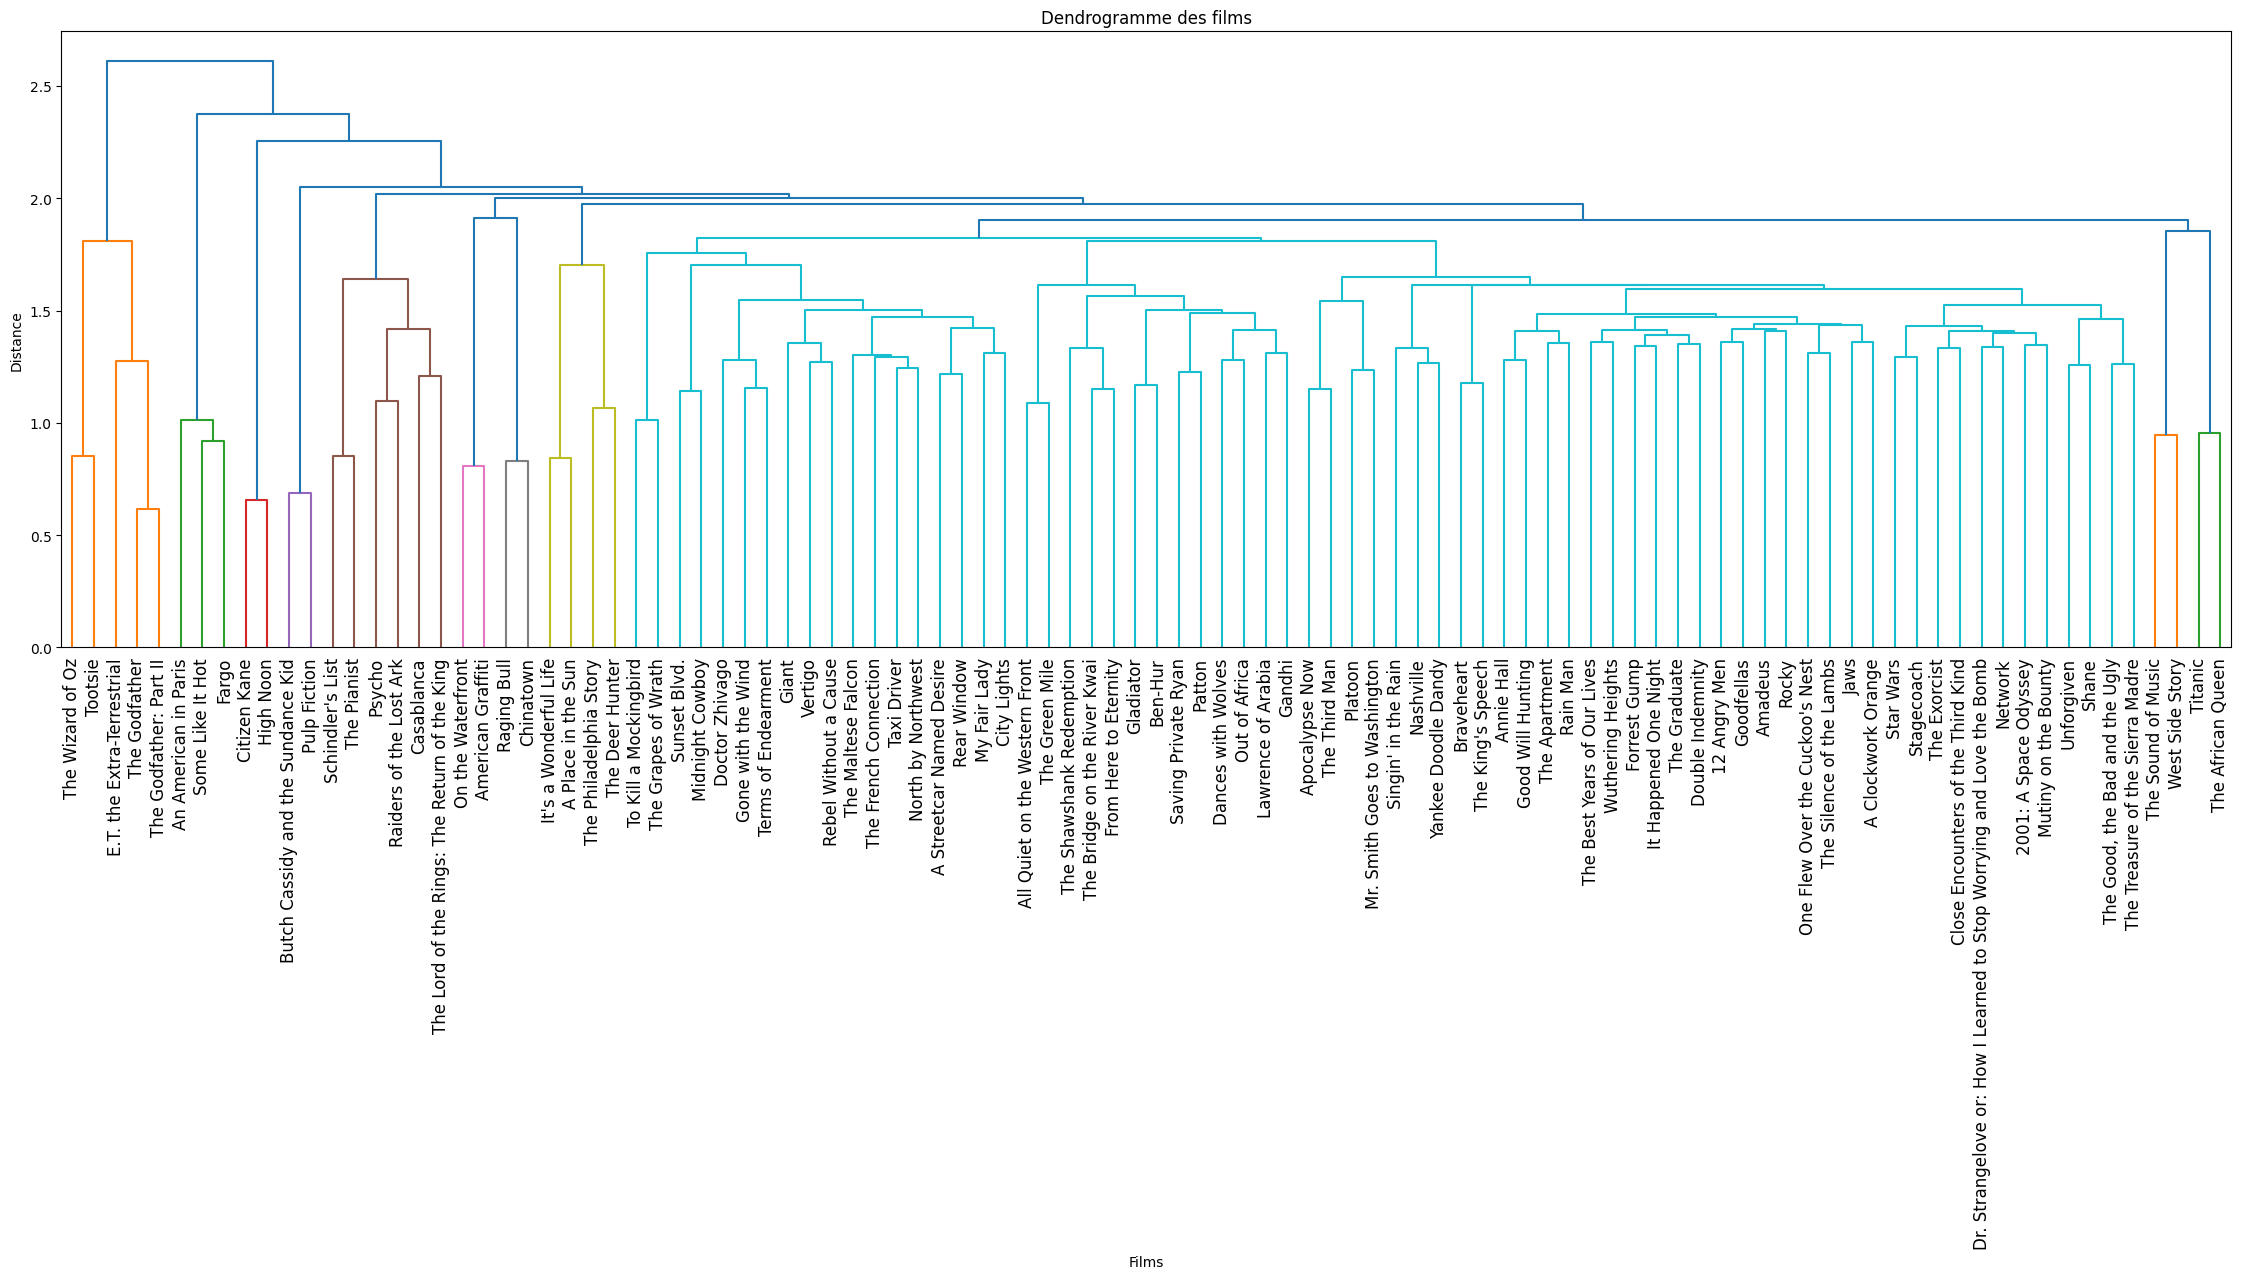

In [28]:
# Affichage du dendrogramme avec étiquetage des feuilles
movie_titles = df["Title"].tolist()
plt.figure(figsize=(28, 8))
dendrogram(linkage_matrix, labels=movie_titles , leaf_rotation=90, leaf_font_size=12)
plt.title("Dendrogramme des films")
plt.xlabel("Films")
plt.ylabel("Distance")
plt.show()

d. Veuillez essayer une deuxième méthode de groupement hiérarchique et afficher son dendrogramme.  Comment se compare-t-il au précédent ?  Le trouvez-vous meilleur, moins bon, ou similaire ? 

e. Quel est le nombre de groupes qui vous semble optimal, pour la méthode de votre choix ?  Pourquoi ?

## 4. Affichage des groupes et de leurs mots-clés

Dans cette section, vous utiliserez la méthode de groupement et le nombre de groupes choisis dans la section précédente.  Pour obtenir un nombre de groupe fixé à l'avance à partir de la matrice *linkage* obtenue au 3b ou 3d, vous pouvez utiliser la fonction `cut_tree`de Scipy. 

a. Pour chaque groupe, veuillez afficher :
* le numéro du groupe (commençant par 1)
* les titres des films du groupe
* le nombre de films dans le groupe

b. Pour chacun des groupes précédents, veuillez afficher les six meilleurs mots-clés qui le caractérisent.  On définit les mots-clés comme les mots (donc les dimensions résultant du `TfidfVectorizer`) qui ont les plus grands coefficients dans le centre de gravité du groupe.

c. D'après les titres des films (et vos connaissances), les mots-clés obtenus sont-ils représentatifs des groupes ?

**Fin du Labo 3.**  Veuillez nettoyer ce notebook, afficher les résultats et les commentaires demandés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.